<div style="background: linear-gradient(to right, #2E86C1, #2E86C1, #2E86C1); border-radius: 35px; padding: 35px; font-family: Pacifico, sans-serif; font-size: 30px; color: white; display: inline-block; border: 2px solid transparent; animation: bounce 2s infinite;">
    <span style="font-weight: bold;"></span>
    <span style="color: #2E86C1; margin: 0 10px;"></span>
    <span style="font-style: italic;color:white; font-weight: bold;">✈A Flight Into Financial Analysis - Exploratory Analysis on 💸Boeing Stocks</span>
</div>

<style>
    @keyframes bounce {
        0%, 100% {
            transform: translateY(0);
        }
        50% {
            transform: translateY(-10px);
        }
    }
</style>

<div style="background-color: #2E86C1; padding: 20px; border-radius: 15px; border: 2px solid white; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1); text-align: center;">
    <h1 style="color: white; font-size: 24px; margin-bottom: 20px;">Thanks for stopping by!</h1>
    <p style="color: white; font-size: 16px; margin-bottom: 10px;">👍 Upvote if you found this helpful!</p>
    <p style="color: white; font-size: 16px; margin-bottom: 10px;">💬 Leave feedback to help me improve!</p>
    <p style="color: white; font-size: 16px; margin-bottom: 10px;">🍴 Fork this notebook to make it your own!</p>
    <p style="font-size: 14px; margin-top: 20px;color: white">Your feedback is valuable!</p>
</div>

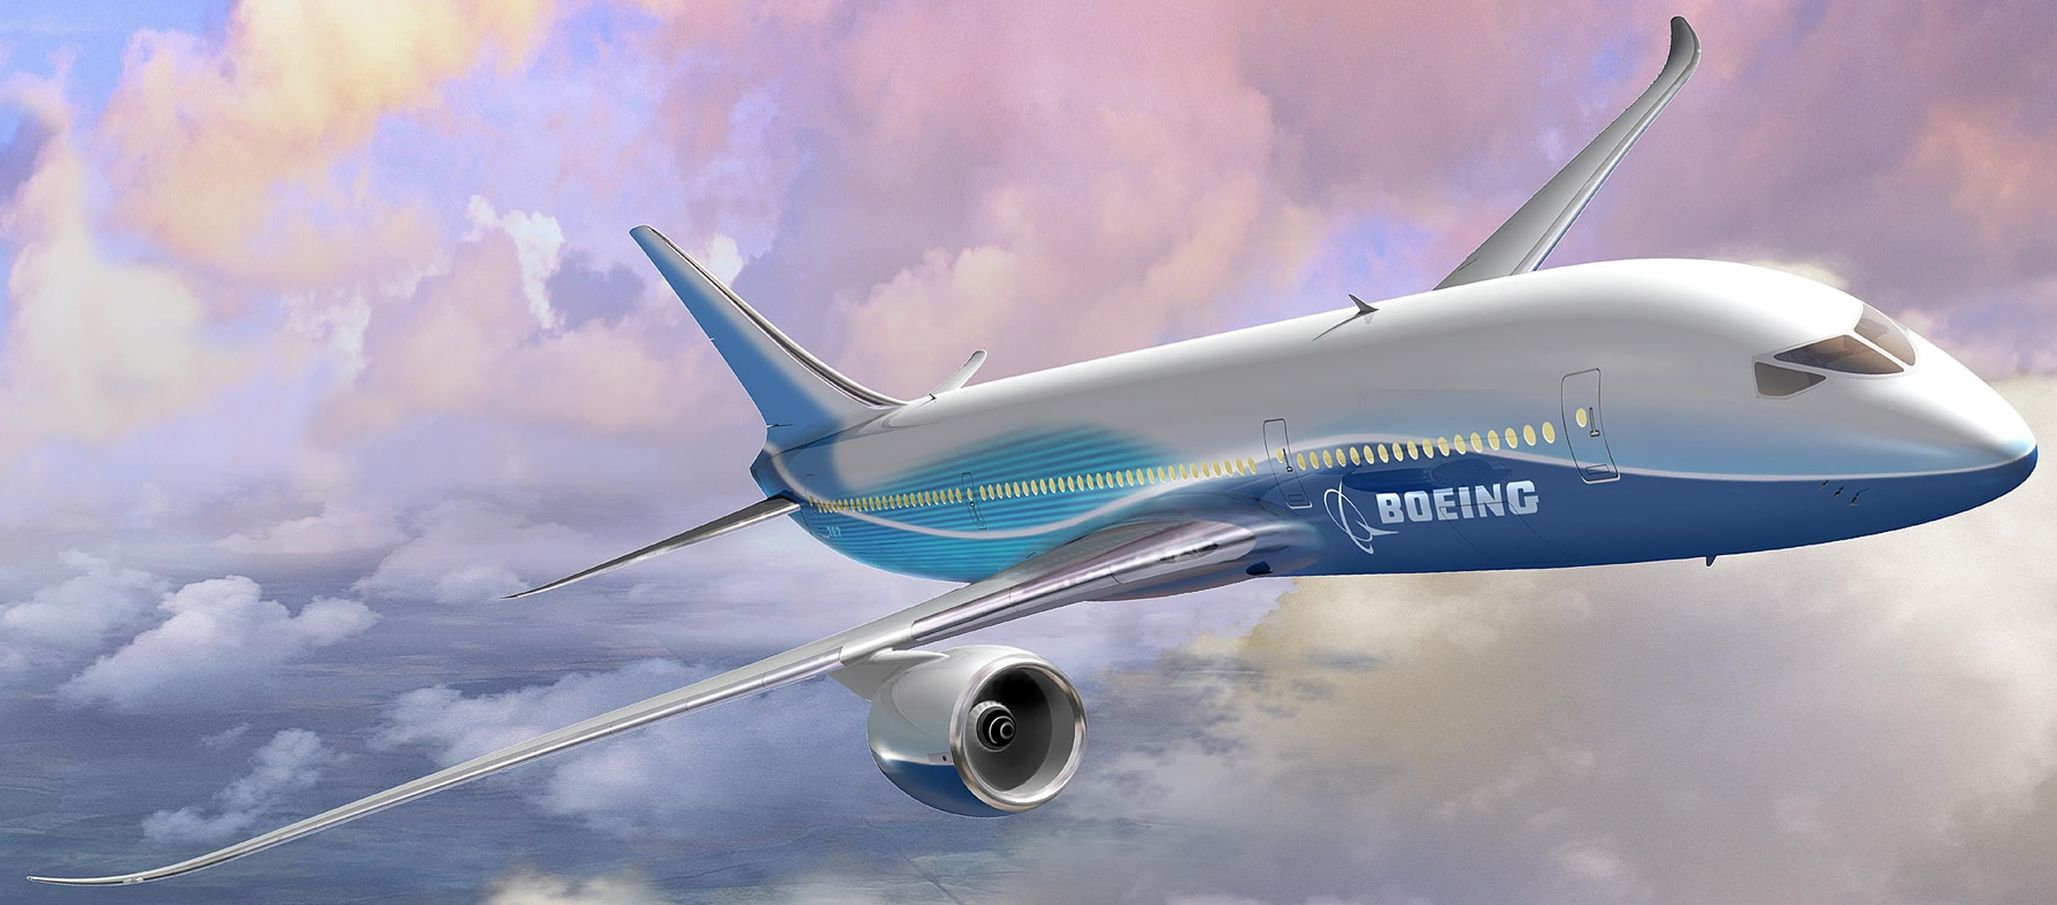

<div style="background-color: #2E86C1; padding: 20px; border-radius: 15px; border: 2px solid white; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1); text-align: left;">
    <h1 style="color: white; font-size: 24px; margin-bottom: 20px;">Introduction</h1>
    <p style="color: white; font-size: 16px; margin-bottom: 10px;">In this notebook, we will analyze Boeing Corporation stocks from 1990 to 2024. We will make predictions and analyze how profitable would it be to buy their stocks. So pack your suitcases💼 and get ready for the flight✈!</p>

</div>

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #FFFFFF; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Setup </p>
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">Let's setup the notebook by making the necessary imports and loading the data.</p>
</div>

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import plotly.graph_objects as go 
from colorama import Fore, Style
from IPython.display import display, HTML
print('Setup Complete')

Setup Complete


In [2]:
def print_boxed_blue_heading(heading):
    gradient = [Fore.RED, Fore.YELLOW, Fore.GREEN, Fore.CYAN, Fore.BLUE, Fore.MAGENTA]
    print("\n" + "=" * (len(heading) + 4))
    words = heading.split()
    for i, word in enumerate(words):
        if i == len(words) - 1:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL} |")
        else:
            print(f"| {gradient[len(word) % len(gradient)] + word + Style.RESET_ALL}", end=" ")
    print("=" * (len(heading) + 4))

def print_error(message):
    raise ValueError(message)

def overview(df):
    try:

        # Display head of the dataset nicely
        print_boxed_blue_heading("The Head Of Dataset is:")
        display(HTML(df.head(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        # Display tail of the dataset nicely
        print_boxed_blue_heading("The Tail Of Dataset is:")
        display(HTML(df.tail(5).to_html(index=False).replace('<table border="1" class="dataframe">', '<table style="border: 2px solid blue;">').replace('<td>', '<td style="color: skyblue;">')))
        print('\n')

        print_boxed_blue_heading("Shape Data:")
        print(f'The Shape of the Data is {df.shape} |')
        print(f'- 1.The No of Rows is {df.shape[0]} |')
        print(f'- 2.The No of Cols is {df.shape[1]}|')
        
        print('\n')
        
        print_boxed_blue_heading("Info Of Data:")
        df.info()

        # Describe both numerical and categorical data
        print_boxed_blue_heading("Numerical Summary of Data:")
        print(f"\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Summary of Data is:{Style.RESET_ALL}")
        display(df.describe().style.set_caption("Data Summary").set_table_styles([{'selector': 'caption', 'props': [('color', 'skyblue')]}]))

        Cat_cols = [col for col in df.columns if df[col].dtype == 'O']
        print_boxed_blue_heading("Categorical Columns of Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Categorical Columns of Data are :{Style.RESET_ALL} {Cat_cols}')

        N_cols = [col for col in df.columns if df[col].dtype == 'float']
        print_boxed_blue_heading("Numerical Columns of Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Numerical Columns of Data are :{Style.RESET_ALL} {N_cols}\n')

        print_boxed_blue_heading("Null Values in Data:")
        print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}The Null Values of Data are:{Style.RESET_ALL}\n{df.isnull().sum()}')

        print_boxed_blue_heading("Duplicates Check in Data:")
        if df.duplicated().any():
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}Duplicates exist in the dataset.{Style.RESET_ALL}')
        else:
            print(f'\n{Style.BRIGHT + Fore.LIGHTBLUE_EX}No duplicates found in the dataset.{Style.RESET_ALL}')

    except Exception as e:
        print_error(e)

In [3]:
data = pd.read_csv('/kaggle/input/boeing-corporation-stocks/BA.csv')

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #FFFFFF; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Data Viewing </p>
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">Let's view the loaded data to understand some of its properties.</p>
</div>

In [4]:
overview(data)


| The | Head | Of | Dataset | is: |


Date,Open,High,Low,Close,Adj Close,Volume
1990-01-02,19.791668,20.500000,19.666668,20.500000,11.043630,2042400
1990-01-03,20.500000,21.083332,20.250000,21.000000,11.312984,2803200
1990-01-04,20.916668,20.916668,20.500000,20.916668,11.268099,3361500
1990-01-05,20.791668,20.791668,20.583332,20.625000,11.110966,1600500
1990-01-08,20.625000,20.916668,20.541668,20.875000,11.245644,1416600





| The | Tail | Of | Dataset | is: |


Date,Open,High,Low,Close,Adj Close,Volume
2024-04-29,167.899994,173.809998,167.550003,173.490005,173.490005,7788600
2024-04-30,171.490005,174.070007,167.759995,167.839996,167.839996,8248800
2024-05-01,167.500000,173.860001,167.500000,171.460007,171.460007,6191900
2024-05-02,173.000000,178.899994,172.250000,178.850006,178.850006,10209900
2024-05-03,179.589996,180.490005,177.899994,179.166504,179.166504,3157605





| Shape | Data: |
The Shape of the Data is (8651, 7) |
- 1.The No of Rows is 8651 |
- 2.The No of Cols is 7|



| Info | Of | Data: |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8651 entries, 0 to 8650
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8651 non-null   object 
 1   Open       8651 non-null   float64
 2   High       8651 non-null   float64
 3   Low        8651 non-null   float64
 4   Close      8651 non-null   float64
 5   Adj Close  8651 non-null   float64
 6   Volume     8651 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 473.2+ KB

| Numerical | Summary | of | Data: |

The Numerical Summary of Data is:


,Open,High,Low,Close,Adj Close,Volume
count,8651.000000,8651.000000,8651.000000,8651.000000,8651.000000,8651.000000
mean,98.906888,100.080047,97.703284,98.892798,86.494639,5220404.982661
std,89.290771,90.322046,88.224214,89.273432,91.774424,6142317.806134
min,16.812500,17.062500,16.562500,16.812500,9.696537,362600.000000
25%,38.365000,38.918751,37.750000,38.375000,24.994686,2602850.000000
50%,64.129997,64.849998,63.290001,64.099998,47.066605,3756900.000000
75%,133.240005,134.800003,131.965004,133.190002,120.990437,5541000.000000
max,446.010010,446.010010,440.190002,440.619995,430.299957,103212800.000000



| Categorical | Columns | of | Data: |

The Categorical Columns of Data are : ['Date']

| Numerical | Columns | of | Data: |

The Numerical Columns of Data are : ['Open', 'High', 'Low', 'Close', 'Adj Close']


| Null | Values | in | Data: |

The Null Values of Data are:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

| Duplicates | Check | in | Data: |

No duplicates found in the dataset.


<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #FFFFFF; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Exploratory Data Analysis </p>
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">Let's conduct an EDA on the data and observe some of its trends and other properties.</p>
</div>

In [5]:
hovertext=[]
for i in range(len(data['Open'])):
    hovertext.append('Open: '+str(data['Open'][i])+'<br>Close: '+str(data['Close'][i]))
    
fig = go.Figure(data=go.Ohlc(x=data['Date'],
                    open=data['Open'],
                    high=data['High'],
                    low=data['Low'],
                    close=data['Close'],
                    text=hovertext,
                    hoverinfo='text',
                    increasing_line_color= 'royalblue', 
                    decreasing_line_color= 'white'))

fig.update_layout(title='OHLC Chart of Boeing Corporation Stocks',
                template = 'plotly_dark')
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">The graph shows that in between 2015 and 2020, Boeing stocks had reached their all-time peak value, but in the beginning of 2020 the stock prices plummeted drastically. This is because in 2020, the due to the Covid-19 pandemic, the U.S. government halted interstate and international air travel to reduce the risk of the spreading of the virus. This affected Boeing on a large scale, as the amount of airplane orders plummeted incredibly, making their stock prices fall. The graph also shows that lately they have regained their position by stock price on the market, but they are far from near to reach those 2019 record numbers. Let's continue our analysis.</p>
</div>

In [6]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = data['Date'], y = data['Volume'], mode = "lines+markers", name = "Volume", line = dict(color = 'blue')))
fig.update_layout(title='Trading Volume of Boeing Corporation Stocks', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">According to the graph, the trading volume reached its peak on June 2020. This is very interesting, since according to the OHLC chart above, on June 2020, Boeing stocks started slowly regaining their market position after the <a href="https://en.wikipedia.org/wiki/2020_stock_market_crash#:~:text=On%2020%20February%202020%2C%20stock,ended%20on%207%20April%202020." style="color: white; text-decoration: underline;">2020 stock market crash.</a> This shows that people once again decide Boeing as a good ground for profit, and started quickly buying their stocks. Let's move on. </p>
</div>

In [7]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])

df['High_Low_Diff'] = data['High'] - data['Low']

# Create a line plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['High_Low_Diff'], mode='lines', name='High-Low Difference'))

fig.update_layout(title='Stock Volatility (High-Low Difference)',
                xaxis_title='Date',
                yaxis_title='High-Low Difference',
                template='plotly_dark')

fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">As you can see the volatility of the stocks has been relativly low until February 2018, when the volatility suddenly rose to 24.39. But due to the <a href="https://en.wikipedia.org/wiki/2020_stock_market_crash#:~:text=On%2020%20February%202020%2C%20stock,ended%20on%207%20April%202020." style="color: white; text-decoration: underline;">2020 stock market crash,</a> the volatility plummeted due to the falling stock prices. Recently, the volatility has grown and remains pretty stable and consistent with a value of about 13.</p>
</div>

<hr>
<hr>

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #FFFFFF; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Financial Analysis</p>
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">Now let's examine the financial income we can get from buying and holding one share of stocks.</p>
</div>

In [8]:
# Make columns with tomorrow's closing price, the closing difference, the daily return, and the price direction
data['Tomorrow Close'] = data['Close'].shift(-1)
data['Close Diff'] = data['Tomorrow Close'] - data['Close']
data['Daily Return'] = data['Close Diff'] / data['Close']
data['Price Dir'] = [1 if data['Close Diff'].loc[ei] > 0 else 0 for ei in data.index ]
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow Close,Close Diff,Daily Return,Price Dir
0,1990-01-02,19.791668,20.500000,19.666668,20.500000,11.043630,2042400,21.000000,0.500000,0.024390,1
1,1990-01-03,20.500000,21.083332,20.250000,21.000000,11.312984,2803200,20.916668,-0.083332,-0.003968,0
2,1990-01-04,20.916668,20.916668,20.500000,20.916668,11.268099,3361500,20.625000,-0.291668,-0.013944,0
3,1990-01-05,20.791668,20.791668,20.583332,20.625000,11.110966,1600500,20.875000,0.250000,0.012121,1
4,1990-01-08,20.625000,20.916668,20.541668,20.875000,11.245644,1416600,20.625000,-0.250000,-0.011976,0


In [9]:
fig = px.histogram(data, x='Price Dir', nbins=20, title='Distribution of Price Direction', marginal='box', color_discrete_sequence=['blue'])
fig.update_layout(yaxis_title='Count', bargap=0.1, plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">As you can see, the amount of falls in the stocks is 4360, while the amount of rises is only 4291. While this may seem to be all right at a first glance (you could infer that the prices fell as much as they rose), actually this is very important, due to the fact that this shows that their is a possibility of a loss if you buy these stocks. Let's examine this further.</p>
</div>

In [10]:
# Calculate the moving average for 10, 50, and 100 days
data['MA10'] = data['Close'].rolling(10).mean()
data['MA50'] = data['Close'].rolling(50).mean()
data['MA100'] = data['Close'].rolling(100).mean()
data = data.dropna()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data['Date'], y=data['Close'], mode='lines', name='Closing Prices', line=dict(color='tomato')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['MA10'], mode='lines', name='Moving Average 10 days', line=dict(color='lightblue')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['MA50'], mode='lines', name='Moving Average 50 days', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=data['Date'], y=data['MA100'], mode='lines', name='Moving Average 100 days', line=dict(color='orange')))
fig.update_layout(title='Moving Average Values of Boeing Corporation Stocks', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

In [11]:
A_MA10 = data['MA10'].mean()
A_MA50 = data['MA50'].mean()
A_MA100 = data['MA100'].mean()

print('The Average of the Moving Average of 10 days is: ', A_MA10)
print('The Average of the Moving Average of 50 days is: ', A_MA50)
print('The Average of the Moving Average of 100 days is: ', A_MA100)

MA_diff = A_MA50 - A_MA10
print('The difference between MA10 and MA50 is: ', MA_diff)

The Average of the Moving Average of 10 days is:  99.69200200494679
The Average of the Moving Average of 50 days is:  99.32952574792655
The Average of the Moving Average of 100 days is:  98.80240816285348
The difference between MA10 and MA50 is:  -0.36247625702023356


<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">The average of MA10 is gretaer than the average of MA50 only by 0.36247, which shows that the company stocks had many sudden falls and might not be a good choice for large-scale and long-term investments.</p>
</div>

In [12]:
# Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
data['Shares'] = [1 if data.loc[ei, 'MA10'] > data.loc[ei, 'MA50'] else 0 for ei in data.index]
# Make a new column that calculates the amount of profit we can get
data['Profit'] = [data.loc[ei, 'Tomorrow Close'] - data.loc[ei, 'Close'] if data.loc[ei, 'Shares'] == 1 else 0 for ei in data.index]
data.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Tomorrow Close,Close Diff,Daily Return,Price Dir,MA10,MA50,MA100,Shares,Profit
8645,2024-04-26,165.979996,168.649994,164.929993,167.220001,167.220001,7208100,173.490005,6.270004,0.037496,1,168.665001,186.7606,208.3591,0,0.0
8646,2024-04-29,167.899994,173.809998,167.550003,173.490005,173.490005,7788600,167.839996,-5.650009,-0.032567,0,169.232001,186.1238,207.7453,0,0.0
8647,2024-04-30,171.490005,174.070007,167.759995,167.839996,167.839996,8248800,171.460007,3.620011,0.021568,1,168.961000,185.4028,207.0821,0,0.0
8648,2024-05-01,167.500000,173.860001,167.500000,171.460007,171.460007,6191900,178.850006,7.389999,0.043100,1,169.086000,184.7646,206.4278,0,0.0
8649,2024-05-02,173.000000,178.899994,172.250000,178.850006,178.850006,10209900,179.166504,0.316498,0.001770,1,169.948001,184.3102,205.8430,0,0.0


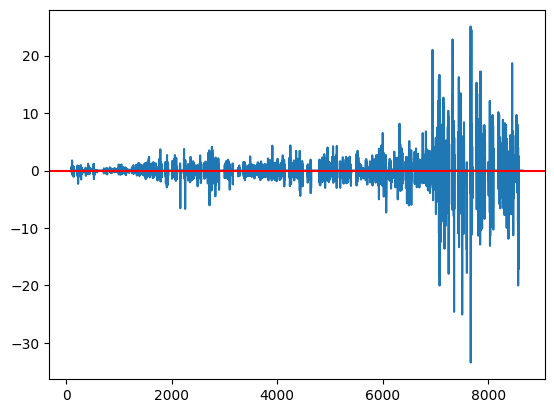

In [13]:
# Plot the profit
data['Profit'].plot()
plt.axhline(y=0, color='red');

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">The graph shows that buying and holding one share of stock may result in a loss.</p>
</div>

In [14]:
data['Wealth'] = data['Profit'].cumsum()
plotly_trace = go.Scatter(x=data.index, y=data['Wealth'], mode='lines', name='Wealth')
layout = go.Layout(title='Total money you get is {}'.format(data.loc[data.index[-2], 'Wealth']), xaxis=dict(title='Index'), yaxis=dict(title='Wealth'))
plotly_figure = go.Figure(data=[plotly_trace], layout=layout)
plotly_figure.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">As you can see on the title, buy and holding one share of Boeing stock will give you 195 dollars. If you bought the stock for 179 dollars, you get 8.393% profit. This doesn't count dividends that are paid by Boeing for owning their stocks. So, based on the information I already have, I can infer that buying Boeing stocks is profitable if bought and sold at the best times, the times where you can lose less and get more money from doing a certain action.</p>
</div>

<hr>
<hr>

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #FFFFFF; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Predictions and Future Analysis</p>
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">Finally, let's predict the future closing prices and make financial inferences on the predictions.</p>
</div>

In [15]:
!pip install -q yfinance

In [16]:
from pandas_datareader.data import DataReader
import yfinance as yf
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader import data as pdr
from sklearn.preprocessing import MinMaxScaler

yf.pdr_override()

# For time stamps
from datetime import datetime
print("Setup Complete")

2024-05-07 19:19:24.699854: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-07 19:19:24.699977: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-07 19:19:24.841139: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Setup Complete


In [17]:
# Create a new dataframe with only the 'Close column 
data = data.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

8124

In [18]:
# Let's scale the dataset to the needed size
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02413635],
       [0.02531614],
       [0.02462793],
       ...,
       [0.35635872],
       [0.36490036],
       [0.38233752]])

In [19]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.02413635, 0.02531614, 0.02462793, 0.02472625, 0.02482455,
       0.0251195 , 0.02698749, 0.02826559, 0.02738075, 0.02718412,
       0.02629928, 0.02521782, 0.02934705, 0.02978947, 0.03082178,
       0.03126419, 0.03126419, 0.02993694, 0.02949452, 0.02890463,
       0.02993694, 0.0280198 , 0.02787232, 0.02831474, 0.029642  ,
       0.02993694, 0.02934705, 0.03008441, 0.03082178, 0.03023189,
       0.03170661, 0.03155914, 0.03111672, 0.03288639, 0.03244398,
       0.03244398, 0.03244398, 0.03141167, 0.03052683, 0.02993694,
       0.02875716, 0.02625013, 0.02742991, 0.02905211, 0.03008441,
       0.03023189, 0.02949452, 0.02846221, 0.02610265, 0.02344815,
       0.02403804, 0.0199088 , 0.02167847, 0.02285826, 0.02462793,
       0.0231532 , 0.02241584, 0.02167847, 0.02212089, 0.02005628])]
[0.017549241312969227]

[array([0.02413635, 0.02531614, 0.02462793, 0.02472625, 0.02482455,
       0.0251195 , 0.02698749, 0.02826559, 0.02738075, 0.02718412,
       0.02629928, 0.02521782, 0.0

In [20]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



8064/8064 ━━━━━━━━━━━━━━━━━━━━ 53s 6ms/step - loss: 0.0014


In [21]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


9.392120048404138

In [22]:
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Create traces
trace1 = go.Scatter(x=train.index, y=train['Close'], mode='lines', name='Train')
trace2 = go.Scatter(x=valid.index, y=valid['Close'], mode='lines', name='Val')
trace3 = go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Predictions')

# Combine traces
fig = go.Figure([trace1, trace2, trace3])

# Update layout
fig.update_layout(
    title='Model Predictions',
    xaxis=dict(title='Date', tickfont=dict(size=14)),
    yaxis=dict(title='Close Price USD ($)', tickfont=dict(size=14)),
    legend=dict(x=0.02, y=0.98),
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white')
)

# Show plot
fig.show()

In [23]:
valid['Future Predictions'] = valid['Predictions'].shift(-1)
valid['Close Diff'] = valid['Future Predictions'] - valid['Predictions']
valid['Daily Return'] = valid['Close Diff'] / valid['Predictions']
valid['Price Dir'] = [1 if valid['Close Diff'].loc[ei] > 0 else 0 for ei in valid.index ]
valid

,Close,Predictions,Future Predictions,Close Diff,Daily Return,Price Dir
8223,158.979996,158.059082,154.268951,-3.790131,-0.023979,0
8224,160.070007,154.268951,153.427307,-0.841644,-0.005456,0
8225,163.600006,153.427307,155.614319,2.187012,0.014254,1
8226,169.380005,155.614319,160.218796,4.604477,0.029589,1
8227,164.529999,160.218796,159.449829,-0.768967,-0.004799,0
...,...,...,...,...,...,...
8645,167.220001,159.461288,160.083466,0.622177,0.003902,1
8646,173.490005,160.083466,164.060196,3.976730,0.024842,1
8647,167.839996,164.060196,162.745361,-1.314835,-0.008014,0
8648,171.460007,162.745361,163.526993,0.781631,0.004803,1


In [24]:
valid['MA10'] = valid['Predictions'].rolling(10).mean()
valid['MA50'] = valid['Predictions'].rolling(50).mean()
valid['MA100'] = valid['Predictions'].rolling(100).mean()
valid = valid.dropna()

In [25]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=valid.index, y=valid['Predictions'], mode='lines', name='Closing Prices', line=dict(color='tomato')))
fig.add_trace(go.Scatter(x=valid.index, y=valid['MA10'], mode='lines', name='Moving Average 10 days', line=dict(color='lightblue')))
fig.add_trace(go.Scatter(x=valid.index, y=valid['MA50'], mode='lines', name='Moving Average 50 days', line=dict(color='yellow')))
fig.add_trace(go.Scatter(x=valid.index, y=valid['MA100'], mode='lines', name='Moving Average 100 days', line=dict(color='orange')))
fig.update_layout(title='Predicted Moving Average Values of Boeing Corporation Stocks', xaxis_title='Date', yaxis_title='Amount', 
                plot_bgcolor='black', paper_bgcolor='black', font=dict(color='white'))
fig.show()

<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #138D75; }
        100% { color: #28B463; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">Notice: At certain times there was a chance to sell a stock and get good profit. We will use this to make our final inference.</p>
</div>

In [26]:
# Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)
valid['Shares'] = [1 if valid.loc[ei, 'MA10'] > valid.loc[ei, 'MA50'] else 0 for ei in valid.index]
# Make a new column that calculates the amount of profit we can get
valid['Profit'] = [valid.loc[ei, 'Future Predictions'] - valid.loc[ei, 'Predictions'] if valid.loc[ei, 'Shares'] == 1 else 0 for ei in valid.index]
valid

/tmp/ipykernel_24/3215717300.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_24/3215717300.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,Predictions,Future Predictions,Close Diff,Daily Return,Price Dir,MA10,MA50,MA100,Shares,Profit
8322,214.320007,198.182419,202.182373,3.999954,0.020183,1,191.285890,172.226446,155.266219,1,3.999954
8323,214.130005,202.182373,204.262085,2.079712,0.010286,1,193.443340,173.539338,155.707452,1,2.079712
8324,211.410004,204.262085,203.277145,-0.984940,-0.004822,0,195.790681,174.881758,156.207383,1,-0.984940
8325,209.410004,203.277145,201.340088,-1.937057,-0.009529,0,197.928369,176.156065,156.705882,1,-1.937057
8326,207.089996,201.340088,199.173355,-2.166733,-0.010762,0,199.532704,177.261396,157.163139,1,-2.166733
...,...,...,...,...,...,...,...,...,...,...,...
8644,166.809998,159.602280,159.461288,-0.140991,-0.000883,0,163.410339,181.067108,201.360114,0,0.000000
8645,167.220001,159.461288,160.083466,0.622177,0.003902,1,162.622548,180.301345,200.768277,0,0.000000
8646,173.490005,160.083466,164.060196,3.976730,0.024842,1,162.178555,179.588133,200.146336,0,0.000000
8647,167.839996,164.060196,162.745361,-1.314835,-0.008014,0,162.348988,178.944051,199.546897,0,0.000000


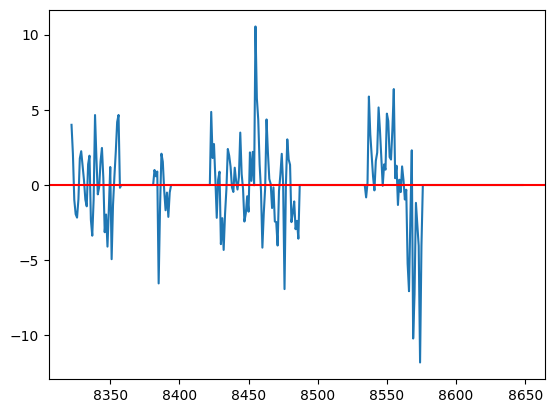

In [27]:
# Plot the profit
valid['Profit'].plot()
plt.axhline(y=0, color='red');

In [28]:
valid['Wealth'] = valid['Profit'].cumsum()
plotly_trace = go.Scatter(x=valid.index, y=valid['Wealth'], mode='lines', name='Wealth')
layout = go.Layout(title='Total money you get is {}'.format(valid.loc[valid.index[-2], 'Wealth']), xaxis=dict(title='Index'), yaxis=dict(title='Wealth'))
plotly_figure = go.Figure(data=[plotly_trace], layout=layout)
plotly_figure.show()

/tmp/ipykernel_24/299391843.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<style>
    @keyframes textAnimation9 {
        0% { color: #2E86C1; }
        50% { color: #FFFFFF; }
        100% { color: #2E86C1; }
    }
</style>

<div style="border: 3px solid #2E86C1; border-radius: 30px; padding: 10px; box-shadow: 0 10px 20px blue; background-color: #2E86C1; max-width: 700px; margin: 10px auto;">
    <p style="font-family: 'Book Antiqua', Palatino, 'Palatino Linotype', serif; font-size: 34px; text-align: center; color: white; font-weight: bold; animation: textAnimation9 10s infinite alternate;">Financial Conclusions</p>
    <p style="color: white; font-size: 16px; margin-bottom: 20px; text-align: center;">The graph says that it wouldn't be profitable to hold the stock. But if you look at 8557 on the line, there was a chance to get 55 dollars in profit. Also, if you sold the stock at that point, you would have got more than 200 dollars back, resulting in about 15% profit! From this we can infer, that Boeing stocks are great stocks for experienced investors, investors that know the best times to buy or sell stocks. We can also say that Boeing stocks are perfect for short-term investments.</p>
</div>

<div style="background: linear-gradient(to right, #2E86C1, #2E86C1, #2E86C1); border-radius: 20px; padding: 20px; font-family: Arial, sans-serif; font-size: 24px; color: white; display: inline-block; border: 2px solid transparent; animation: bounce 2s infinite;">
    <span style="font-weight: bold;"></span>
    <span style="color: #2E86C1; margin: 0 10px;">🌟</span>
    <span style="font-style: italic;color:white ;font-weight: bold;">Thank you for viewing this notebook! Please Upvote👍 and fork🍴. God bless you🙏</span>
</div>

<style>
    @keyframes bounce {
        0%, 100% {
            transform: translateY(0);
        }
        50% {
            transform: translateY(-10px);
        }
    }
</style>